In [3]:
####Haillet's Code
#Dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

Findings: Our dataset comprises information on 8,763 observed patients from 20 different countries. Among these patients, 30.3% are females, while 69.7% are males. The age range of the patients varies from 18 to 90 years old, with a mean age of 53.70 years, a median age of 54 years, and a stadard deviation of 21.

In [22]:

with open('./heart_attack_prediction_dataset.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    headers=next(csvreader)
    data_rows = [row for row in csvreader if row]

    complete_dataset = pd.DataFrame(data_rows,columns=headers)
    
complete_dataset.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.6150014529140595,261404,31.251232725295402,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963458839757678,285768,27.1949733519874,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463425838029828,235282,28.176570683909873,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648980824461007,125640,36.464704293082846,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.5148209264291386,160555,21.809144180619754,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [46]:
#Counting Demographic values
patient_id_count = complete_dataset['Patient ID'].count()
country_count = complete_dataset['Country'].nunique()
age_count = complete_dataset['Age'].count()

data = {
    'Column Name': ['Patient ID', 'Countries', 'Age Count'],
    'Number of Values': [patient_id_count, country_count, age_count]
}

description_dataframe = pd.DataFrame(data)

description_dataframe



,Column Name,Number of Values
0,Patient ID,8763
1,Countries,20
2,Age Count,8763


In [40]:
#Patients by Country Distribution
country_counts = complete_dataset['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Print the DataFrame
country_counts



,Country,Count
0,Germany,477
1,Argentina,471
2,Brazil,462
3,United Kingdom,457
4,Australia,449
5,Nigeria,448
6,France,446
7,Canada,440
8,China,436
9,New Zealand,435


In [54]:
#Age Stats

#Covert Age into a numeric value
complete_dataset['Age'] = pd.to_numeric(complete_dataset['Age'], errors='coerce')

#Calculate Stats
age_mean=complete_dataset ['Age'].mean()
age_median=complete_dataset ['Age'].median()
age_mode=complete_dataset ['Age'].mode()[0]
max_age = complete_dataset['Age'].max()
min_age = complete_dataset['Age'].min()
std_dev_age = complete_dataset['Age'].std()


Age_stats={ 'Age':['Mean', 'Median', 'Mode', 'Max Value', 'Min Value', 'Std Dev'],
           'Results':[age_mean,age_median,age_mode, max_age,min_age, std_dev_age]}

Age_stats_df=pd.DataFrame(Age_stats)

Age_stats_df

,Age,Results
0,Mean,53.707977
1,Median,54.000000
2,Mode,90.000000
3,Max Value,90.000000
4,Min Value,18.000000
5,Std Dev,21.249509


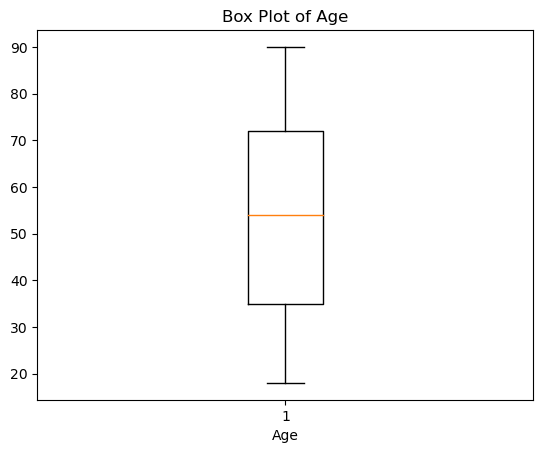

In [76]:
# Box plot
age_data = complete_dataset['Age']

plt.boxplot(age_data, vert=True)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.xlabel('Age')

plt.show()


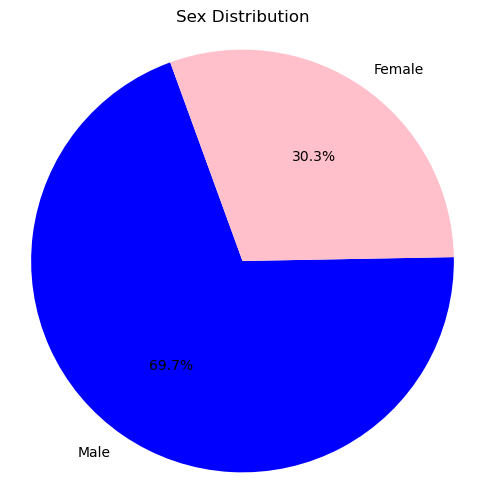

In [36]:
#Sex Breakdown

sex_counts = complete_dataset['Sex'].value_counts()
labels = sex_counts.index
sizes = sex_counts.values
colors=['blue','pink']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', startangle=110)
plt.title('Sex Distribution')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
